## importing the libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

## load the data

In [108]:
df = pd.read_csv("car_data.csv")

## info about data

In [109]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [110]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [112]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [113]:
df.duplicated().value_counts()

False    299
True       2
dtype: int64

In [114]:
df.drop_duplicates(inplace=True)

In [115]:
df.isnull().value_counts()

Car_Name  Year   Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
False     False  False          False          False       False      False        False         False    299
dtype: int64

## data visualization

<AxesSubplot:xlabel='Fuel_Type', ylabel='Kms_Driven'>

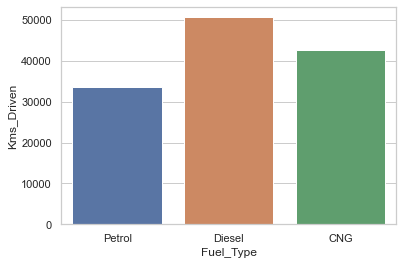

In [116]:
#kms vs fuel type
sns.barplot(x='Fuel_Type',
           y='Kms_Driven',
           data=df,ci=False)

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

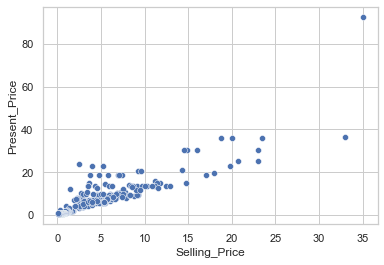

In [117]:
sns.scatterplot(x='Selling_Price',
                y='Present_Price',
                data=df)

C:\Users\DESKTOP!!!\AppData\Local\Temp\ipykernel_9632\2919823989.py:2: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df_1 = df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)


<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

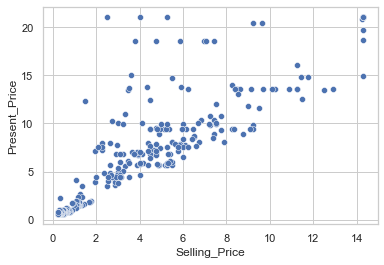

In [118]:
# remove outliers using clip method
df_1 = df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)

sns.scatterplot(x='Selling_Price',
                y='Present_Price',
                data=df_1)

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

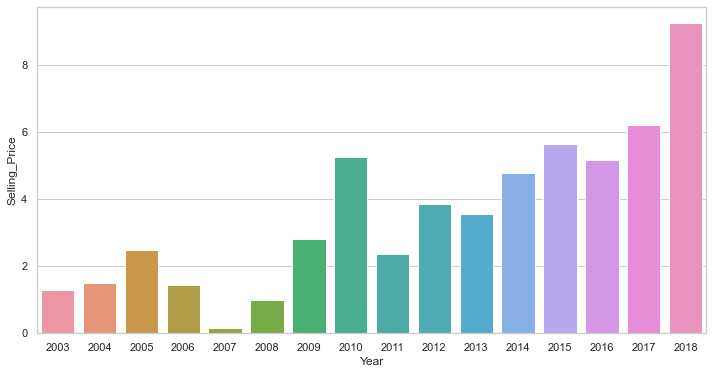

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Selling_Price', data=df, ci=None)

<AxesSubplot:xlabel='Kms_Driven'>

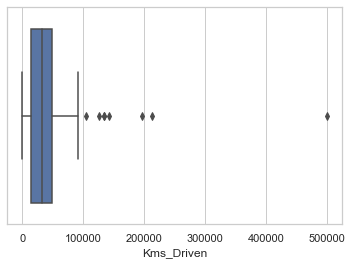

In [120]:
sns.boxplot(x='Kms_Driven',
            data=df)

In [121]:
Q1 = df['Kms_Driven'].quantile(0.25)
Q3 = df['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1
df_3 = df[(df['Kms_Driven'] >= Q1 - 1.5*IQR) & (df['Kms_Driven'] <= Q3 + 1.5*IQR)]


<AxesSubplot:xlabel='Kms_Driven'>

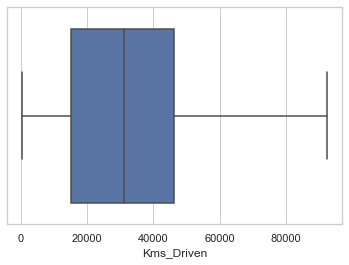

In [122]:
sns.boxplot(x='Kms_Driven',
            data=df_3)

<AxesSubplot:>

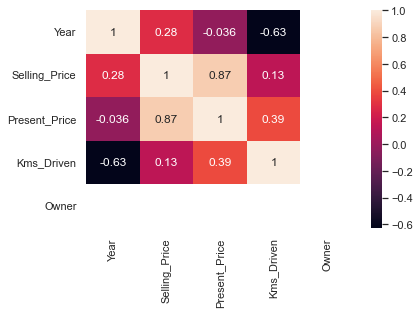

In [123]:
sns.heatmap(df_1.corr(), annot=True)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

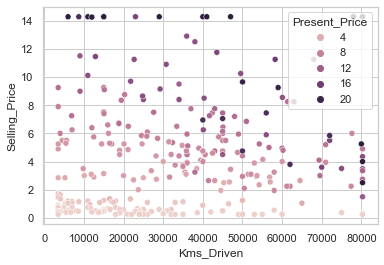

In [124]:
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='Present_Price', data=df_1)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

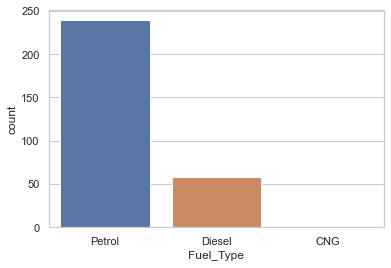

In [125]:
sns.countplot(x='Fuel_Type', data=df)

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

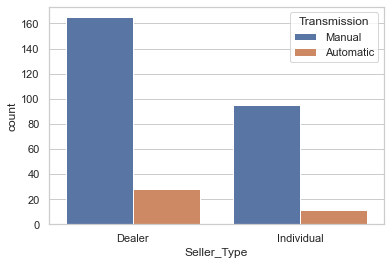

In [126]:
sns.countplot(x='Seller_Type', hue='Transmission', data=df)